In [1]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

2022-06-23 09:48:14.317395: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


'2.9.1'

In [2]:
keras.__version__

'2.9.0'

# Load dataset and preprocessing

In [28]:
fashion_mnist = keras.datasets.fashion_mnist
(X_full, y_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_full.shape

(60000, 28, 28)

In [5]:
# Split dataset
def split_dataset(X, y, val_ratio=0.2):
    val_size = int(X.shape[0] * val_ratio)
    X_train, X_valid = X[val_size:] / 255.0, X[:val_size] / 255.0
    y_train, y_valid = y[val_size:], y[:val_size]
    return (X_train, y_train), (X_valid, y_valid)

(X_train, y_train), (X_valid, y_valid) = split_dataset(X_full, y_full)

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

%matplotlib inline 

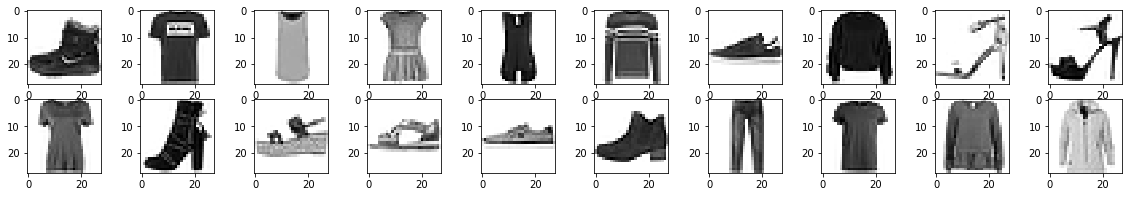

In [13]:
plt.rcParams["figure.figsize"] = (20,3)

idx = 0
fig, ax = plt.subplots(nrows=2, ncols=10)
for row in ax:
    for col in row:
        img = Image.fromarray(255 - X_full[idx])
        label = class_names[y_full[idx]]
        idx += 1
        col.imshow(img, cmap='gray', interpolation='nearest').

plt.show()

# Create model using Keras

In [15]:
# simple MLP
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
# advanced call
model.layers

In [19]:
hidden1 = model.layers[1]
hidden1

In [20]:
weights, biases = hidden1.get_weights()
weights

array([[ 5.86134046e-02, -4.90399860e-02,  4.13491353e-02, ...,
        -8.65660608e-03, -3.68585698e-02, -7.14717582e-02],
       [ 6.25792891e-03,  4.51411158e-02,  2.71975994e-03, ...,
         2.08564103e-04, -1.35249905e-02,  5.68758845e-02],
       [ 3.03020701e-02, -5.73249906e-03, -5.55897802e-02, ...,
         1.35480687e-02,  9.51245427e-04,  2.33277678e-05],
       ...,
       [-3.31119783e-02, -6.71772808e-02, -3.61267924e-02, ...,
        -6.17431812e-02, -2.15583220e-02, -3.18713039e-02],
       [ 1.34047791e-02,  6.05035573e-02, -2.12738663e-03, ...,
         4.10074666e-02, -6.96436018e-02,  1.33577213e-02],
       [-1.56423375e-02, -5.79452589e-02,  5.30187339e-02, ...,
         4.03447449e-02,  4.40070629e-02,  2.96896175e-02]], dtype=float32)

In [23]:
model.compile(loss='sparse_categorical_crossentropy', 
            optimizer='sgd',
            metrics=['accuracy'])
        

In [24]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
   1/1500 [..............................] - ETA: 23:21 - loss: 2.4544 - accuracy: 0.0312

2022-06-23 10:27:48.984430: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1500/1500 [==============================] - 3s 1ms/step - loss: 0.7363 - accuracy: 0.7648 - val_loss: 0.5237 - val_accuracy: 0.8220
Epoch 2/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4972 - accuracy: 0.8267 - val_loss: 0.4637 - val_accuracy: 0.8436
Epoch 3/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4512 - accuracy: 0.8420 - val_loss: 0.4610 - val_accuracy: 0.8381
Epoch 4/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4241 - accuracy: 0.8520 - val_loss: 0.4191 - val_accuracy: 0.8540
Epoch 5/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4025 - accuracy: 0.8585 - val_loss: 0.4180 - val_accuracy: 0.8525
Epoch 6/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3859 - accuracy: 0.8644 - val_loss: 0.3764 - val_accuracy: 0.8681
Epoch 7/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3732 - accuracy: 0.8679 - val_loss: 0.3747 - val_accuracy: 0.8692
Epo

# Insight

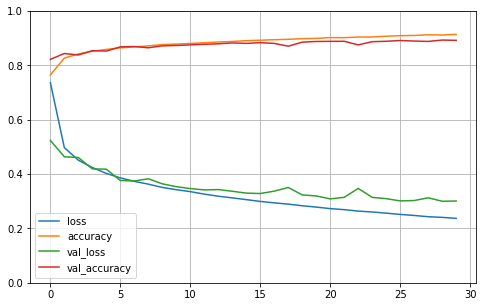

In [26]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 917us/step - loss: 61.7563 - accuracy: 0.8485


[61.75626754760742, 0.8485000133514404]

In [31]:
simple_test = X_test[:3]
predict = model.predict(simple_test)
predict.round(2)

1/1 [==============================] - 0s 14ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

: 